In [1]:
#import the necessary libraries except sklearnss for now
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
sns.set_style(style='darkgrid', rc={'figure.figsize': (20, 20)})
%matplotlib inline

In [2]:
#load the data and see it
data=pd.read_csv('car data.csv')
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#get the shape of the data
data.shape

(301, 9)

In [4]:
#general info about dtypes, columns and entries of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#create lists for the numeric and categorical variables except  car name not that helpful
num=['Year','Selling_Price','Present_Price','Driven_kms','Owner']
cat=['Fuel_Type','Selling_type','Transmission']

In [6]:
#check the uniqueness of the values of each column
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

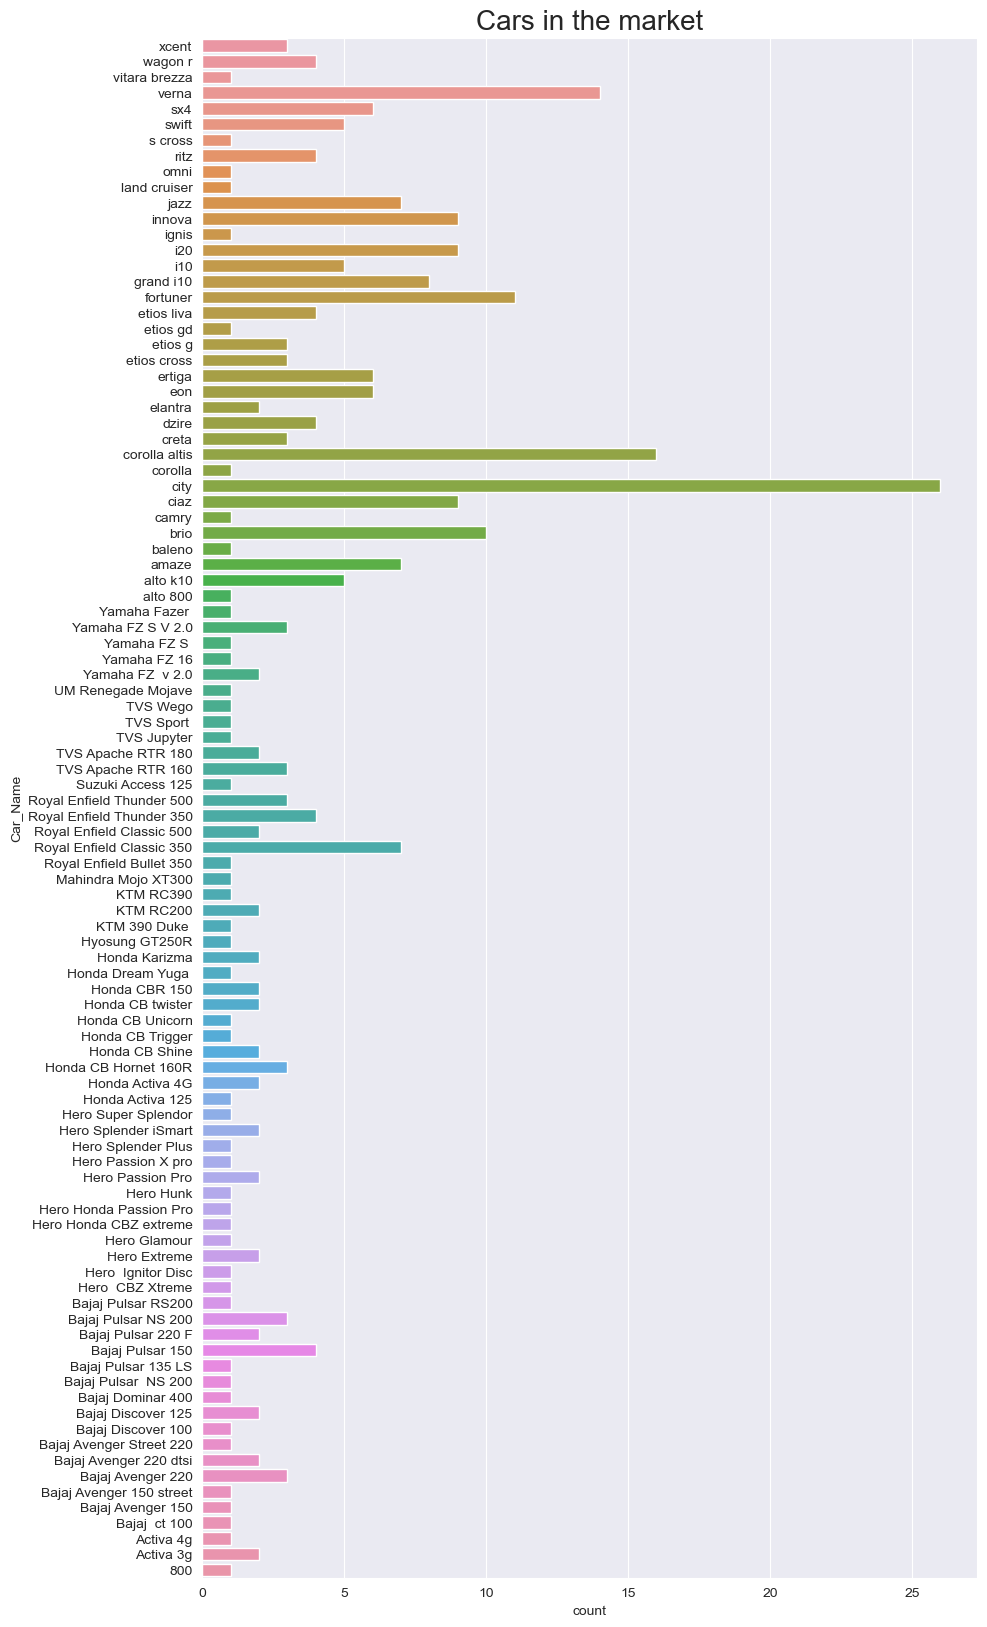

In [7]:
#show the number of cars in the market we have information on
plt.figure(figsize = (10, 20))
sns.countplot(y = data.Car_Name.sort_values(ascending=False))
plt.title("Cars in the market", fontsize = 20)
plt.show()

In [8]:
#creating functions for my barplots and scatterplots to make it easier and less code
def relation_with_avg_price_plot(column):
    data.groupby([column])['Present_Price'].mean().plot(kind = 'bar')
    plt.xticks(rotation=45)
    plt.title(f"The average price of cars by {column}", fontsize = 20)
    plt.show()
   #this is to count the number of cars for each categorical column 
def countplot_no_of_cars(column):
    sns.countplot(x=data[column])
    plt.title(f"Number of cars by {column}", fontsize = 20)
    plt.xticks(rotation=45)
    plt.show()
    #this is a scatterplot with our target variable, present price
def scatter_with_present_price(col):
    plt.scatter(col,'Present_Price', data=data)
    plt.xlabel(f'The {col}')
    plt.ylabel('Present market price of car')
    plt.legend()
    plt.show()

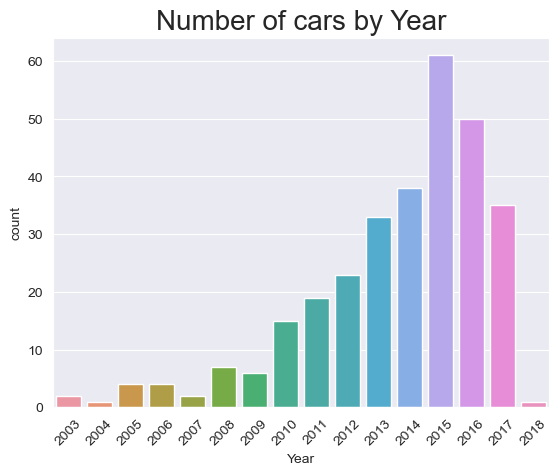

In [9]:
countplot_no_of_cars('Year')

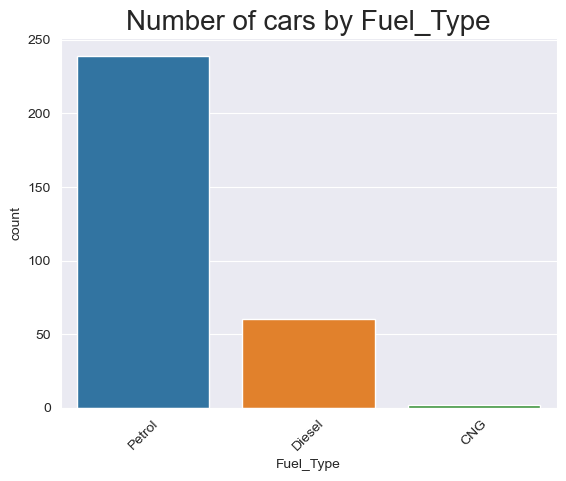

In [10]:
countplot_no_of_cars('Fuel_Type')

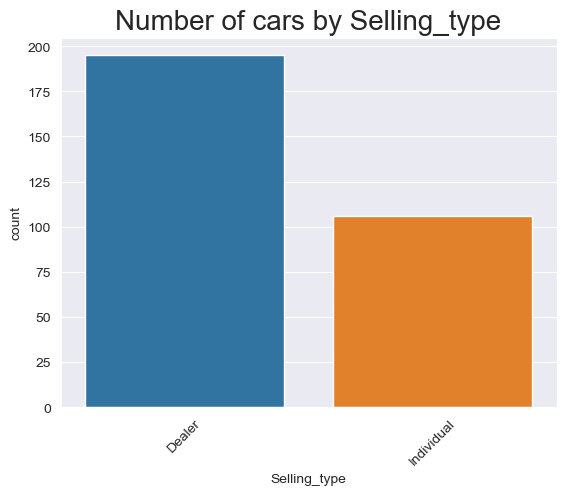

In [11]:
countplot_no_of_cars('Selling_type')

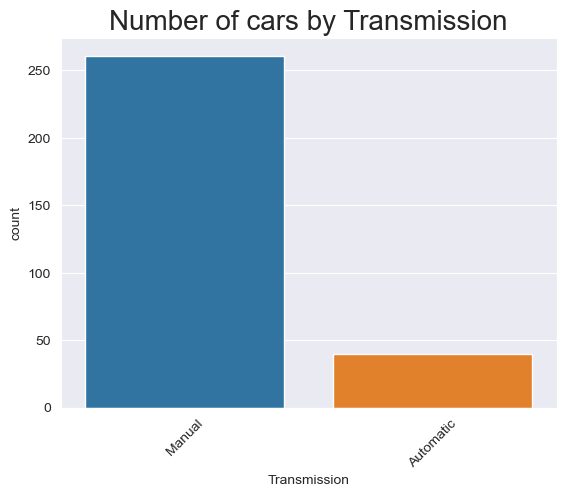

In [12]:
countplot_no_of_cars('Transmission')

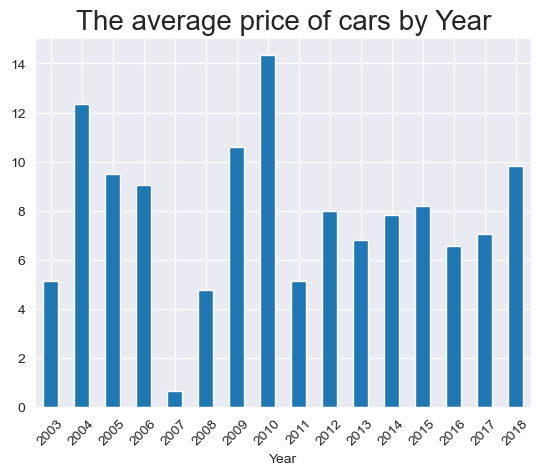

In [13]:
relation_with_avg_price_plot('Year')

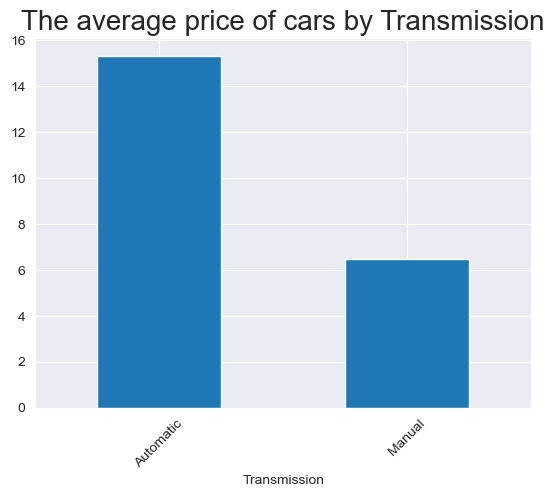

In [14]:
relation_with_avg_price_plot('Transmission')

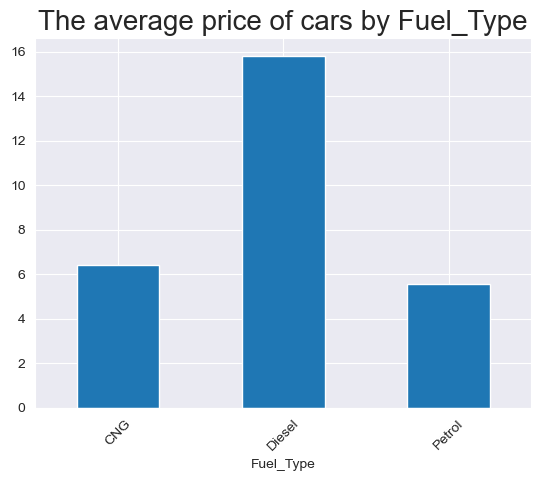

In [15]:
relation_with_avg_price_plot('Fuel_Type')

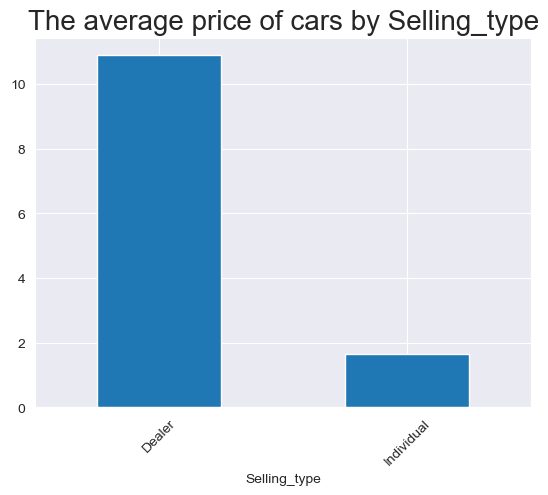

In [16]:
relation_with_avg_price_plot('Selling_type')

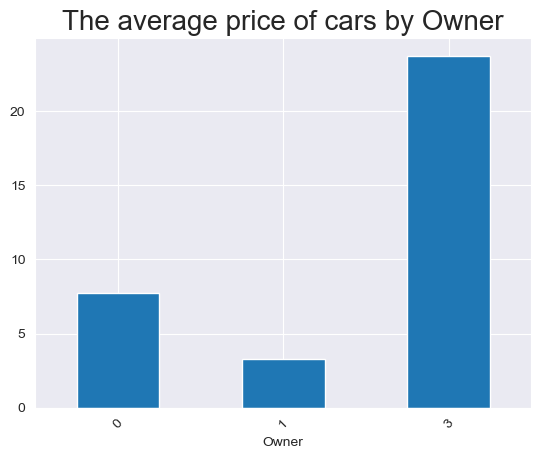

In [17]:
relation_with_avg_price_plot('Owner')

In [18]:
#check why the cars with 3 owners are more expensive than others 
data[data['Owner']==3]
#its actually just a single value that is probably expensive for its popular durability

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


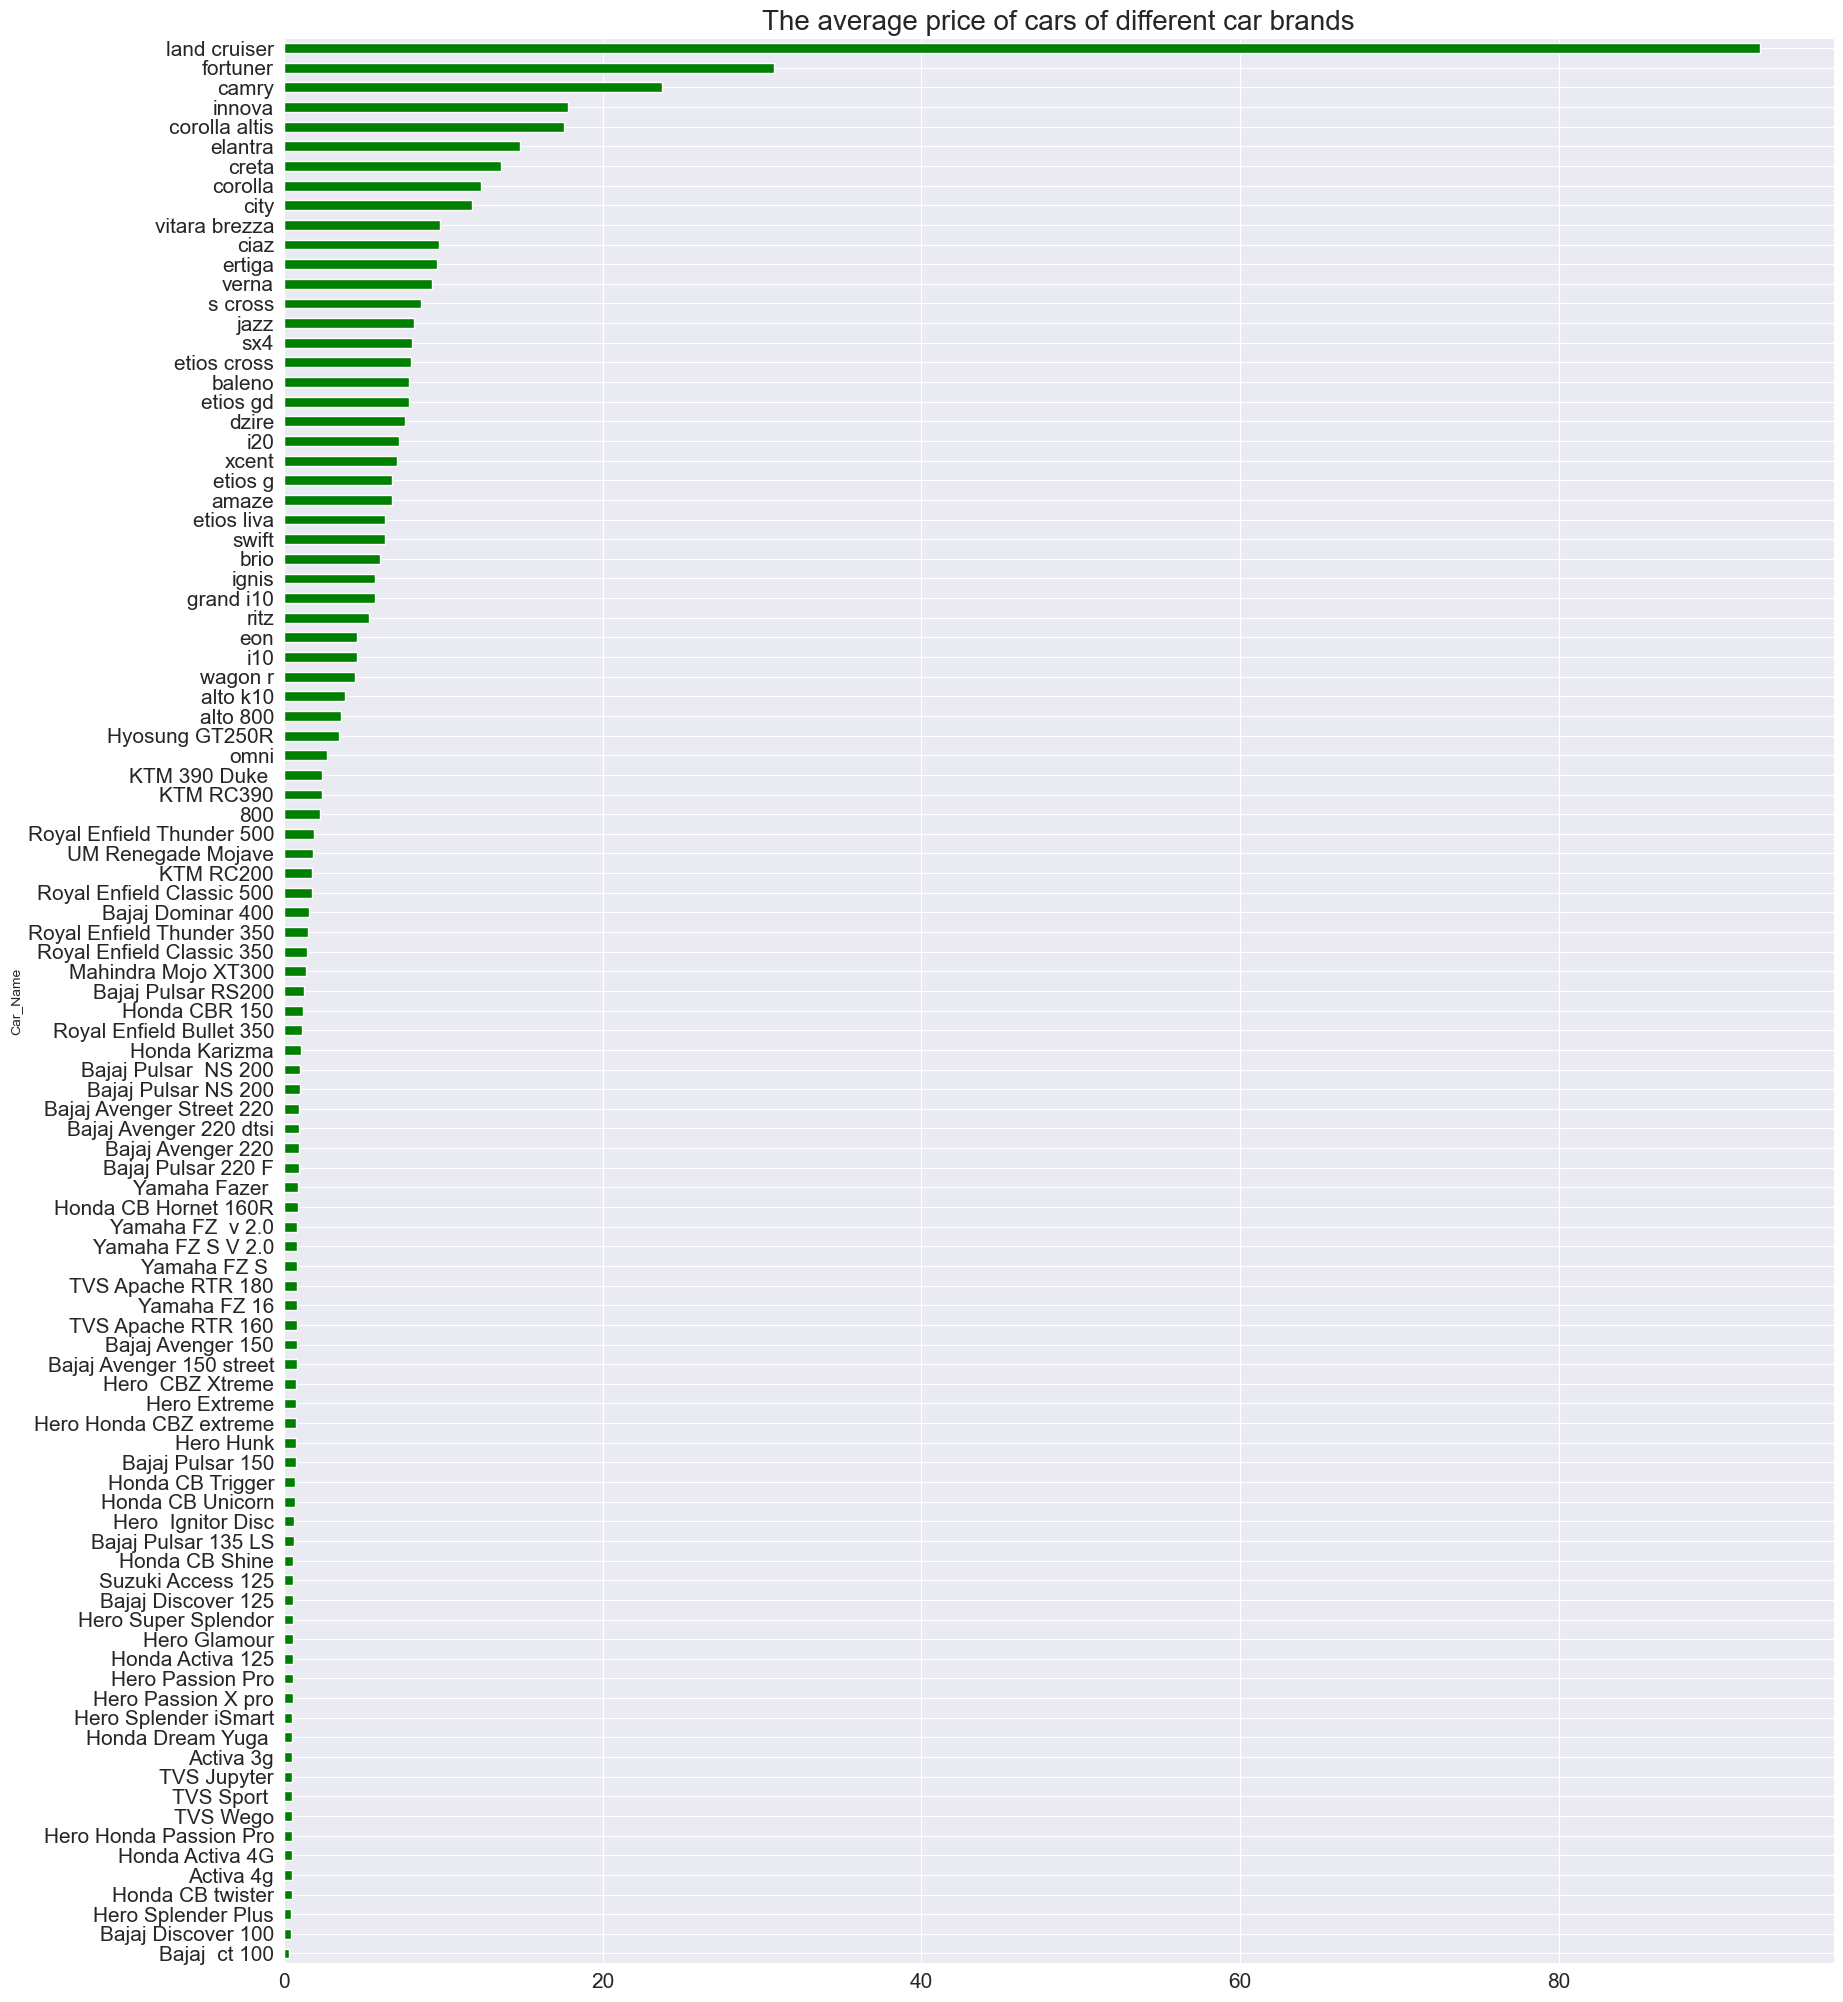

In [19]:
#This is the average price of cars by the different brands
plt.figure(figsize = (20, 25))
data.groupby(['Car_Name'])['Present_Price'].mean().sort_values(ascending = True).plot(kind = 'barh', fontsize = 15, color='g')
plt.title("The average price of cars of different car brands", fontsize = 20)
plt.show()

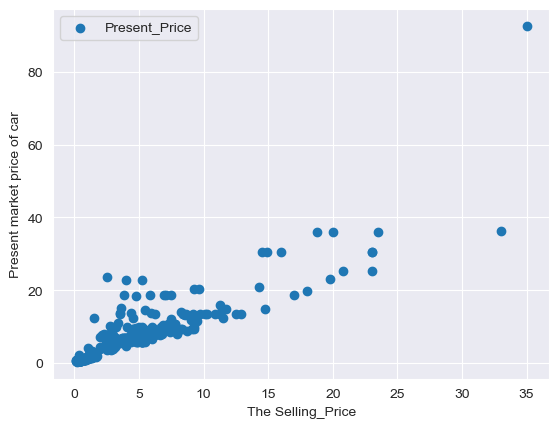

In [20]:
scatter_with_present_price('Selling_Price')

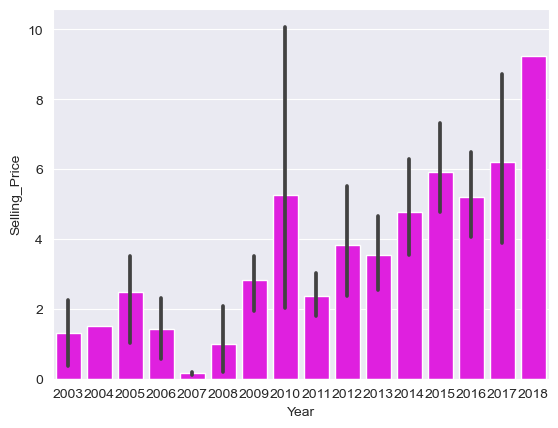

In [21]:
#a barplot of the selling prices across different years and 2010 shows high variability
sns.barplot(data,x='Year',y='Selling_Price',color='magenta')
plt.show()

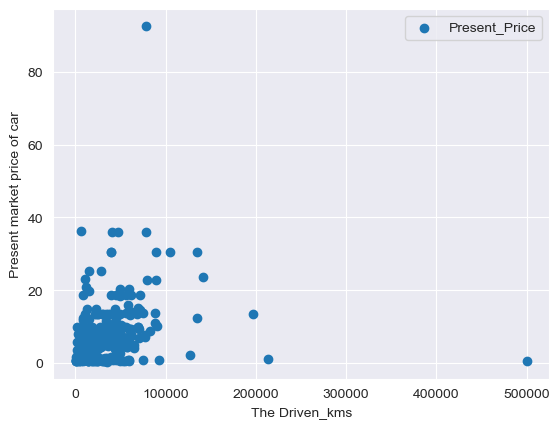

In [22]:
scatter_with_present_price('Driven_kms')

In [23]:
#check on the outliers noticed
data[data['Driven_kms'] > 150000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [24]:
#A little feature engineering to check if there is a relationship between how long a car has been in the market and its increase or price
data['Market_year']= 2024- data['Year']
data['increment_value']=data['Present_Price']-data['Selling_Price']

In [25]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Market_year,increment_value
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10,2.27


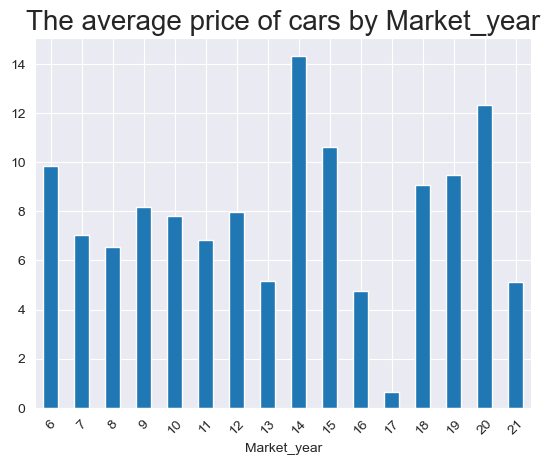

In [26]:
relation_with_avg_price_plot('Market_year')

In [27]:
#Cars in 2010 are priced higher so we get a closer to look to be sure its not just outliers
data[data['Market_year']==14]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Market_year,increment_value
19,sx4,2010,2.65,7.98,41442,Petrol,Dealer,Manual,0,14,5.33
28,alto k10,2010,1.95,3.95,44542,Petrol,Dealer,Manual,0,14,2.00
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,14,13.79
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0,14,11.20
78,corolla altis,2010,5.25,22.83,80000,Petrol,Dealer,Automatic,0,14,17.58
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0,14,57.60
99,fortuner,2010,9.65,20.45,50024,Diesel,Dealer,Manual,0,14,10.80
148,Bajaj Pulsar 220 F,2010,0.52,0.94,45000,Petrol,Individual,Manual,0,14,0.42
163,Bajaj Avenger 220 dtsi,2010,0.45,0.95,27000,Petrol,Individual,Manual,0,14,0.50
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,14,0.74


In [28]:
#20 years in the market followed suit but it's just one car, which might be known for it's durability the last of its kind
data[data['Market_year']==20]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Market_year,increment_value
77,corolla,2004,1.5,12.35,135154,Petrol,Dealer,Automatic,0,20,10.85


In [29]:
data[data['Market_year']==17]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Market_year,increment_value
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1,17,0.55
199,Honda CB Shine,2007,0.12,0.58,53000,Petrol,Individual,Manual,0,17,0.46


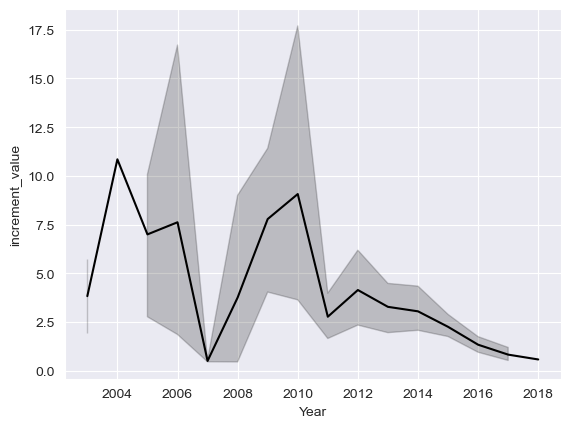

In [30]:
#checking the average increment value over the years
sns.lineplot(data,x='Year',y='increment_value',color='black')
plt.show()

In [31]:
#2007 had a huge dip so check, it's probably they're not improving marketing, the transmission type is manual and there are more popular cars with better mileage
data[data['Year']==2007]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Market_year,increment_value
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1,17,0.55
199,Honda CB Shine,2007,0.12,0.58,53000,Petrol,Individual,Manual,0,17,0.46


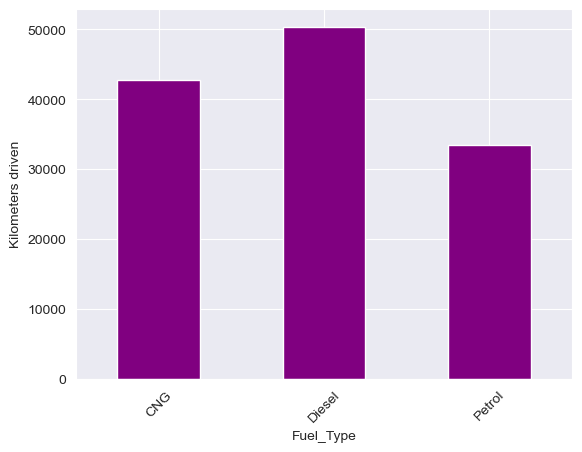

In [32]:
#finding relationship between fuel type and mileage. P.S I used median too and got not much difference in the result
data.groupby('Fuel_Type')['Driven_kms'].mean().plot(kind = 'bar', color='purple')
plt.ylabel('Kilometers driven')
plt.xticks(rotation=45)
plt.show()

<Axes: >

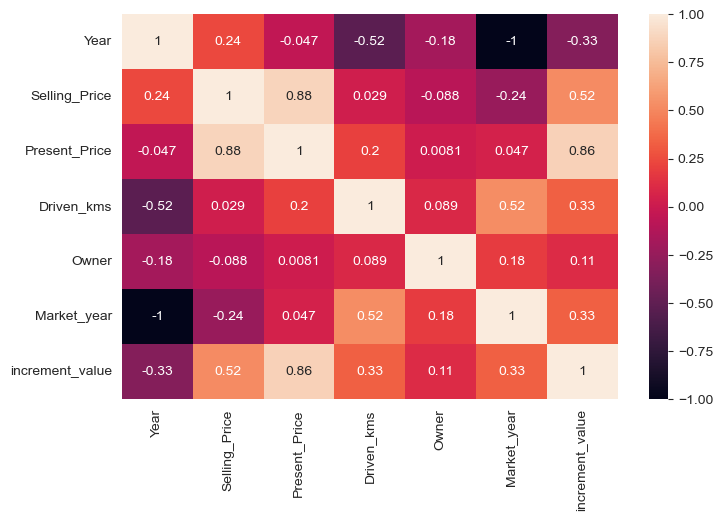

In [33]:
#correlation matrix of numerical features
plt.figure(figsize = (8, 5))
num=[]
for col in data.columns:
    if col not in cat and col!='Car_Name':
        num.append(col)
hminfo = data[num].corr()

sns.heatmap(hminfo, annot = True)

In [34]:
#extremely high multicollinearity between market_year and year, so drop it
data=data.drop('Market_year', axis=1)

In [35]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,increment_value
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [36]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,increment_value
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,2.967176
std,2.891554,5.082812,8.642584,38886.883882,0.247915,4.828067
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.030000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.390000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.650000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,3.350000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,57.600000


In [37]:
#missing values where?!!
data.isnull().sum()

Car_Name           0
Year               0
Selling_Price      0
Present_Price      0
Driven_kms         0
Fuel_Type          0
Selling_type       0
Transmission       0
Owner              0
increment_value    0
dtype: int64

In [38]:
# Create OneHotEncoder instance with sparse=False to return a dense array forgot it and was frustrated
enc = OneHotEncoder(sparse_output=False)

# Fit the encoder on the categorical columns and transform,then to dataframe
enc.fit(data[cat])
ohe_df = pd.DataFrame(enc.transform(data[cat]), columns=enc.get_feature_names_out(cat))

# Making sure the indexes align
ohe_df.index = data.index

# Drop the original categorical columns from X and concatenate the original with encoded dfs
data = data.drop(cat, axis=1)
data = pd.concat([data, ohe_df], axis=1)
print(data.shape)

(301, 14)


In [39]:
# Fit the encoder on the carname and the target present_Price
te = TargetEncoder()
data['Car_Name'] = te.fit_transform(data[['Car_Name']], data['Present_Price'])

In [40]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,increment_value,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,5.439465,2014,3.35,5.59,27000,0,2.24,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,7.713420,2013,4.75,9.54,43000,0,4.79,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,9.737019,2017,7.25,9.85,6900,0,2.60,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,4.752995,2011,2.85,4.15,5200,0,1.30,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,6.330065,2014,4.60,6.87,42450,0,2.27,0.0,1.0,0.0,1.0,0.0,0.0,1.0


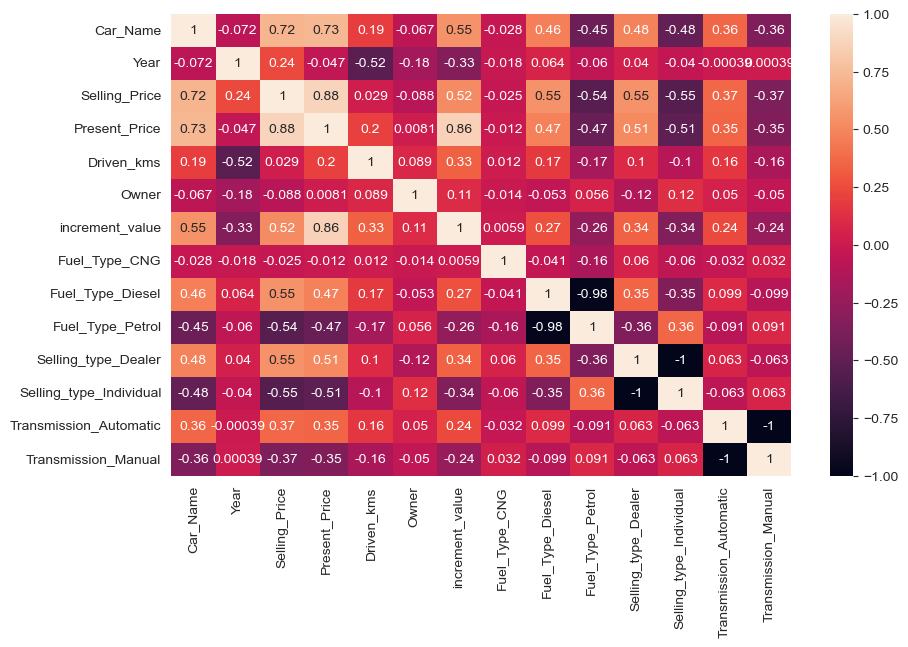

In [41]:
#correlation matrix of all variables in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [42]:
#drop necessary variables to eliminate multicollinearity and biased model
data=data.drop(['Fuel_Type_Diesel','Selling_type_Dealer','Transmission_Automatic','increment_value','Selling_Price'], axis=1)

<Axes: >

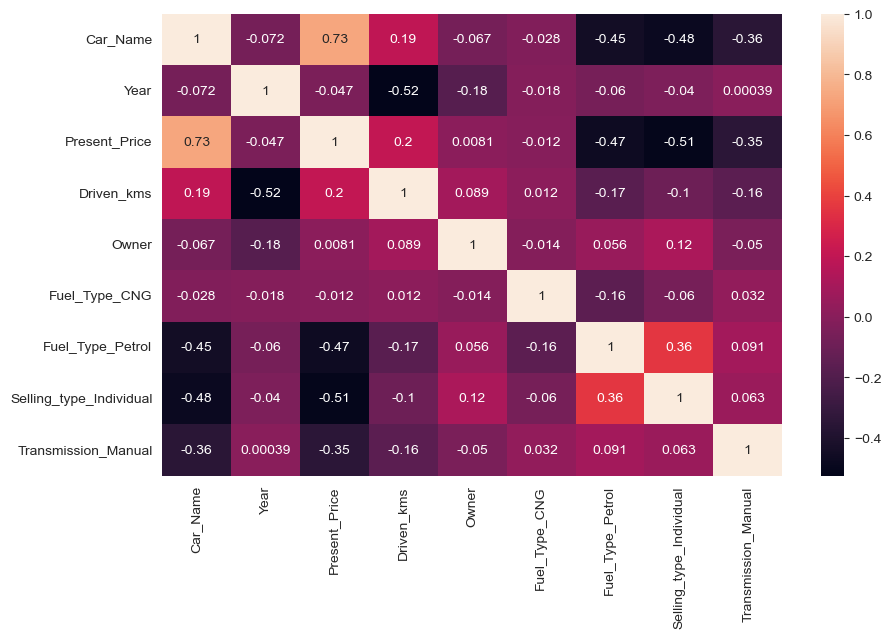

In [43]:
#check if there's any other relationship we might have missed
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car_Name                 301 non-null    float64
 1   Year                     301 non-null    int64  
 2   Present_Price            301 non-null    float64
 3   Driven_kms               301 non-null    int64  
 4   Owner                    301 non-null    int64  
 5   Fuel_Type_CNG            301 non-null    float64
 6   Fuel_Type_Petrol         301 non-null    float64
 7   Selling_type_Individual  301 non-null    float64
 8   Transmission_Manual      301 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 21.3 KB


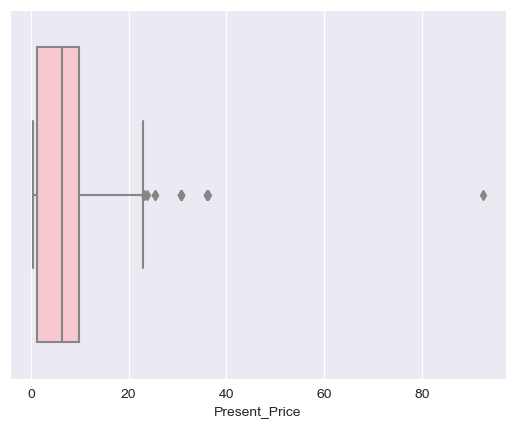

In [45]:
#Boxplot=dataset.remove(outliers ^o^)
sns.boxplot(x = 'Present_Price', data = data, color = 'pink')
plt.show()

In [46]:
for i in range(90, 99):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['Present_Price'], i)))
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['Present_Price'], i)))
IQR=data.Present_Price.quantile(0.75)-data.Present_Price.quantile(0.25)
data=data[data['Present_Price']<(data.Present_Price.quantile(0.75)+(IQR*1.5))]    

The 90.0th percentile value is 14.79
The 91.0th percentile value is 16.09
The 92.0th percentile value is 18.61
The 93.0th percentile value is 18.61
The 94.0th percentile value is 20.45
The 95.0th percentile value is 22.78
The 96.0th percentile value is 23.73
The 97.0th percentile value is 30.61
The 98.0th percentile value is 30.61
The 99.0th percentile value is 35.96
The 99.1th percentile value is 35.96
The 99.2th percentile value is 35.96
The 99.3th percentile value is 35.96
The 99.4th percentile value is 36.01
The 99.5th percentile value is 36.09
The 99.6th percentile value is 36.18
The 99.7th percentile value is 41.87
The 99.8th percentile value is 58.78
The 99.9th percentile value is 75.69


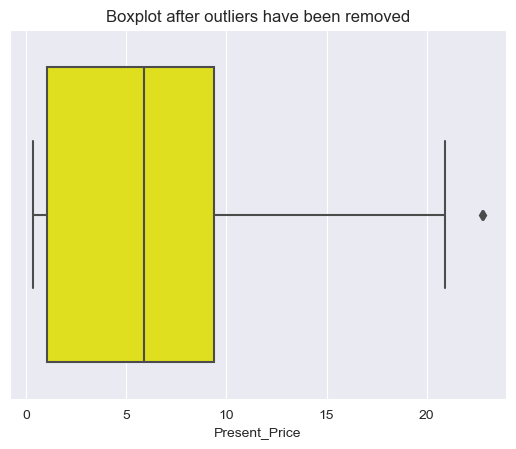

In [47]:
#After outliers have been removed
sns.boxplot(x = 'Present_Price', data = data, color = 'yellow')
plt.title('Boxplot after outliers have been removed')
plt.show()

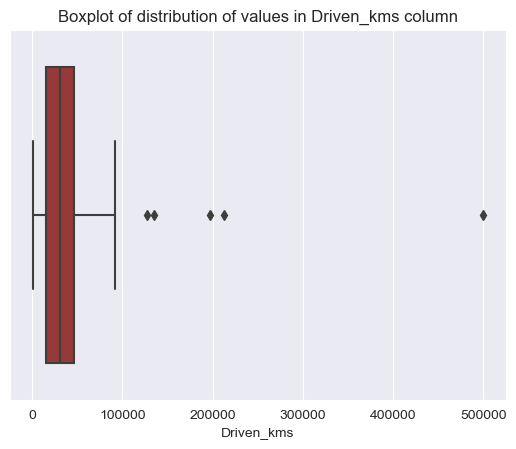

In [48]:
#Boxplot=dataset.remove(outliers ^o^)
sns.boxplot(x = 'Driven_kms', data = data, color = 'brown')
plt.title('Boxplot of distribution of values in Driven_kms column')
plt.show()

In [49]:
for i in range(90, 99):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['Driven_kms'], i)))
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['Driven_kms'], i)))
IQR=data.Driven_kms.quantile(0.75)-data.Driven_kms.quantile(0.25)
data=data[data['Driven_kms']<(data.Driven_kms.quantile(0.75)+(IQR*1.5))]    

The 90.0th percentile value is 61628.60
The 91.0th percentile value is 63398.32
The 92.0th percentile value is 68160.92
The 93.0th percentile value is 69991.24
The 94.0th percentile value is 71840.00
The 95.0th percentile value is 75000.00
The 96.0th percentile value is 78958.08
The 97.0th percentile value is 87961.72
The 98.0th percentile value is 90625.24
The 99.0th percentile value is 143837.08
The 99.1th percentile value is 161575.37
The 99.2th percentile value is 179313.66
The 99.3th percentile value is 197051.96
The 99.4th percentile value is 201670.02
The 99.5th percentile value is 206195.68
The 99.6th percentile value is 210721.34
The 99.7th percentile value is 253754.00
The 99.8th percentile value is 335836.00
The 99.9th percentile value is 417918.00


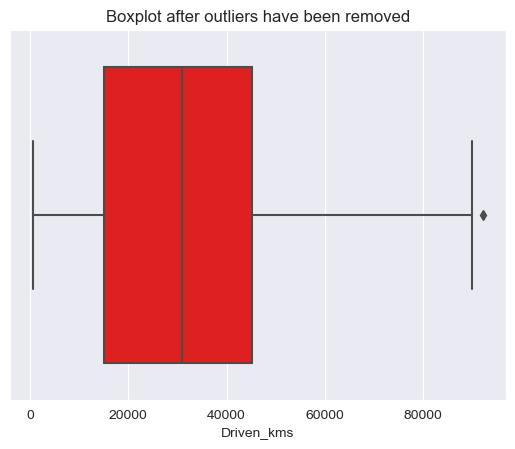

In [50]:
sns.boxplot(x = 'Driven_kms', data = data, color = 'red')
plt.title('Boxplot after outliers have been removed')
plt.show()

In [51]:
data.shape

(282, 9)

In [52]:
#Shuffle the data for more randomness in modelling then split to independent and target variable
shuffled_data = shuffle(data, random_state = 100)
X= shuffled_data.drop('Present_Price',axis=1)
y=shuffled_data['Present_Price']

In [53]:
#scale your data, make it make more sense to your model
scaler= MinMaxScaler()
X_=scaler.fit_transform(X)

In [54]:
#traintestsplit for modelling
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.3, random_state=1232)

In [55]:
#modelling and predicting
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_ = lr.predict(X_train)
y_pred = lr.predict(X_test)

#evaluation timeeee
print('EVALUATION METRICS:\nThe R-squared score for the training set is',r2_score(y_pred_, y_train).round(2))
print('The R-squared score for the test set is',r2_score(y_pred, y_test).round(2))
print('The mean squared error for the training set is',mean_squared_error(y_pred_, y_train).round(2))
print('The mean squared error for the test set is',mean_squared_error(y_pred, y_test).round(2))
print('The mean absolute error for the training set is',mean_absolute_error(y_pred_, y_train).round(2))
print('The mean absolute error for the test set is',mean_absolute_error(y_pred, y_test).round(2))

EVALUATION METRICS:
The R-squared score for the training set is 0.8
The R-squared score for the test set is 0.79
The mean squared error for the training set is 4.66
The mean squared error for the test set is 4.01
The mean absolute error for the training set is 1.7
The mean absolute error for the test set is 1.62


In [56]:
#other regressor models
rf=RandomForestRegressor(random_state=1111)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)
print('r-squared of test set is',r2_score(y_predrf, y_test))
#specify the randomstate it will keep changing

print('The mean squared error for the test set is',mean_squared_error(y_predrf, y_test).round(2))
print('The mean absolute error for the test set is',mean_absolute_error(y_predrf, y_test).round(2))

r-squared of test set is 0.9086263273961385
The mean squared error for the test set is 2.11
The mean absolute error for the test set is 0.83


In [57]:
#other regressor models
gb=GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_predgb = gb.predict(X_test)

print('r-squared of test set is',r2_score(y_predgb, y_test))
print('The mean squared error for the test set is',mean_squared_error(y_predgb, y_test).round(2))
print('The mean absolute error for the test set is',mean_absolute_error(y_predgb, y_test).round(2))

r-squared of test set is 0.8943570752009228
The mean squared error for the test set is 2.36
The mean absolute error for the test set is 0.92


In [58]:
#a dataframe of all the results side by side
y_pred= pd.DataFrame(y_pred.round(2), columns=['Linear_reg_pred'])
results=pd.concat([y_test.to_frame().reset_index(drop = True),y_pred], axis = 1, ignore_index = False)
y_predrf= pd.DataFrame(y_predrf.round(2), columns=['predicted values'])
y_predgb= pd.DataFrame(y_predgb, columns=['Grad_boost_pred'])
results['Grad_boost_pred']=y_predgb
results['Rand_forest_pred']=y_predrf
results.head()

,Present_Price,Linear_reg_pred,Grad_boost_pred,Rand_forest_pred
0,5.70,7.90,5.782317,6.24
1,0.80,3.12,1.337474,1.35
2,6.80,7.28,6.778148,6.92
3,0.64,3.23,1.256824,0.89
4,0.72,3.87,1.072037,0.68


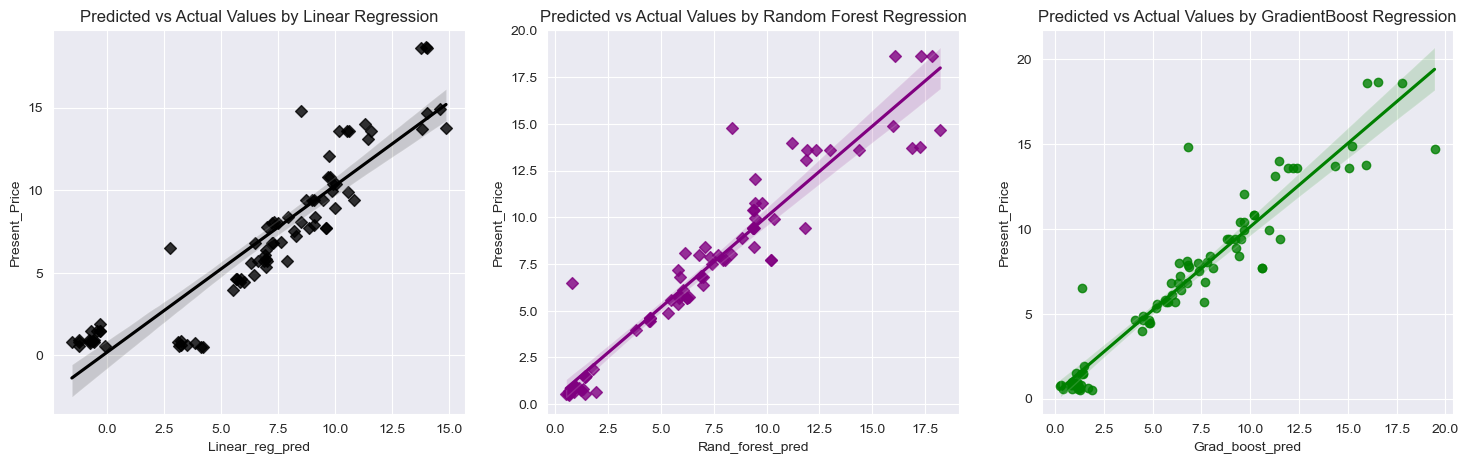

In [59]:
#all 3 model predictions visualised
fig,ax =plt.subplots(1,3, figsize=(15,5))
ax[0].set_title('Predicted vs Actual Values by Linear Regression')
sns.regplot(data=results, x='Linear_reg_pred', y='Present_Price',color='black',marker='D',ax=ax[0])
ax[1].set_title('Predicted vs Actual Values by Random Forest Regression')
sns.regplot(data=results, x='Rand_forest_pred', y='Present_Price', color='purple',marker='D' ,ax=ax[1])
ax[2].set_title('Predicted vs Actual Values by GradientBoost Regression')
sns.regplot(data=results, x='Grad_boost_pred', y='Present_Price', color='green')
plt.tight_layout(pad=2)

In [60]:
X_const=sm.add_constant(X)
model=sm.OLS(y,X_const).fit()
pred=model.predict(X_const)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Present_Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     170.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.91e-101
Time:                        17:21:42   Log-Likelihood:                -610.68
No. Observations:                 282   AIC:                             1239.
Df Residuals:                     273   BIC:                             1272.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

#### Data science checklist
- load libraries and data
- Get a view of what data looks like, including each column
- If supervised, check relationship with target variables(not just corelation aunty), 
- If unsupervised, i don't really know yet, find patterns I guess for grouping
- check relationship among variables too especially time if present
- Basic descriptive stats I guess
- Outliers OUTTTTTT!
- Missing values INNNNNNNNNNNNNNN(or out if I'm not feeling it)!!!
- Feature Engineering/Selection then check it's relationship with others too
- Categorical variable dealing e.g target encoder, OHE,LE, getdummies
- Shuffle then train test splitttttttttttt
- hyperparameter tuning
- Train model
- predict
- Evaluate model
- Executive summary or communication to stake holders